Caso apresente a mensagem **Note: you may need to restart the kernel to use updated packages.**

Reiniciar o kernel do notebook menu Kernel >> Restart Kernel

Reinstalar o pacote


In [1]:
%pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


**Import das bibliotecas necessárias**

In [13]:
import psycopg2
import pandas as pd
from psycopg2 import Error
import warnings
warnings.filterwarnings('ignore')

**Classe de conexão com o banco de dados**

In [8]:
class Conexao:
    def __init__(self):
        try:
            # Connect to an existing database
            connection = psycopg2.connect(user="airflow",
                                          password="airflow",
                                          host="postgres",
                                          port="5432",
                                          database="db_pytest")

            # # Create a cursor to perform database operations
            # cursor = connection.cursor()
            # # Print PostgreSQL details
            # print("PostgreSQL server information")
            # print(connection.get_dsn_parameters(), "\n")
            # # Executing a SQL query
            # cursor.execute("SELECT * from public.dados")
            # # Fetch result
            # record = cursor.fetchone()
            # print("You are connected to - ", record, "\n")
            self.connection = connection
        except (Exception, Error) as error:
            print("Error while connecting to PostgreSQL", error)
    def select(self,sql):
        cursor = self.connection.cursor()
        cursor.execute(sql)
        retorno = cursor.fetchall()
        cursor.close()
        return retorno

    def get_conn(self):
        return self.connection

    def close(self):
        self.connection.close()
        print("PostgreSQL connection is closed")

**Consultar dados do banco de dados**

In [14]:
conn = Conexao().get_conn()
sql = 'select * from public.dados'
df = pd.io.sql.read_sql_query(sql, conn)

**Criar gráfico de pizza com a quantidade de pessoas por classe**

<AxesSubplot:title={'center':'Quantidade por Classe'}, ylabel='População'>

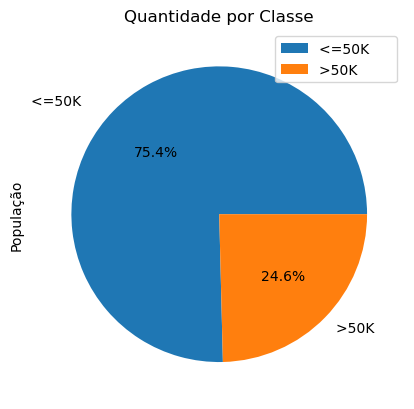

In [15]:
df.groupby(['class']).sum().plot(kind='pie', title='Quantidade por Classe', ylabel='População', y='fnlwgt', autopct='%1.1f%%')

**Criar gráfico de barras com a quantidade de pessoas por Classe de Trabalho**

<AxesSubplot:title={'center':'Quantidade por Workclasse'}, ylabel='workclass'>

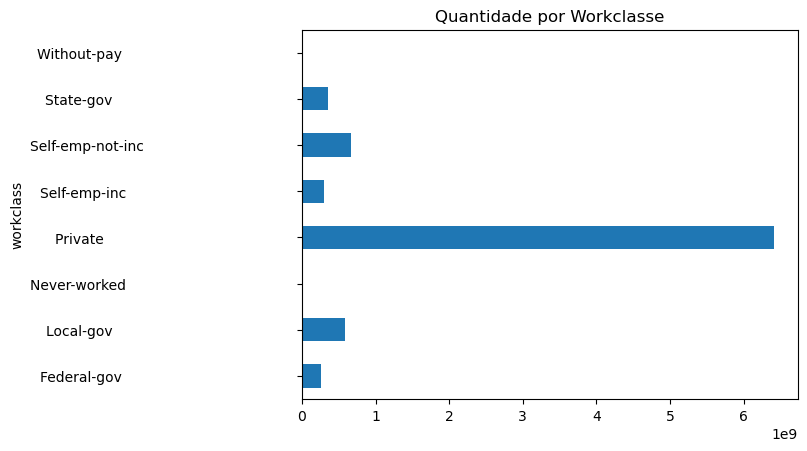

In [16]:
df.groupby(['workclass']).sum().plot(kind='barh', y='fnlwgt',ylabel='Percentual', title="Quantidade por Workclasse", legend=False)
# ax.bar_label(ax.containers[0])